In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

These are the abbreviations used by the original dataset:
* Gender
    * M = Male
    * F = Female
    * None = Unknown
* Race
    * W = White, non-Hispanic
    * B = Black, non-Hispanic
    * A = Asian
    * N = Native American
    * H = Hispanic
    * O = Other
    * None = Unknown

In [2]:
filepath = "fatal-police-shootings-data.csv"
data = pd.read_csv(filepath)

In [31]:
# Keys for accessing columns in the data
MANNER = "manner_of_death"
ARMED = "armed"
AGE = "age"
GENDER = "gender"
RACE = "race"
STATE = "state"
SIGNS = "signs_of_mental_illness"
THREAT = "threat_level"
FLEE = "flee"
BODY = "body_camera"
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Data Visualization
First, let's look at general characteristics of the data.

## Manner of death

Text(0.5, 1.0, 'Manner of death distribution')

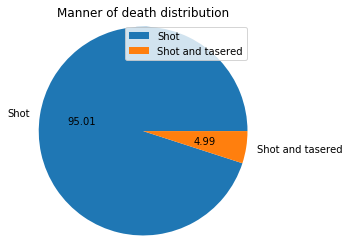

In [4]:
x = [(data[MANNER] == "shot").value_counts()[True], (data[MANNER] == "shot and Tasered").value_counts()[True]]
labels = ["Shot", "Shot and tasered"]
plt.pie(x, labels=labels, autopct="%.2f", radius=1.2)
plt.legend()
plt.title("Manner of death distribution")

## Armed

<BarContainer object of 10 artists>

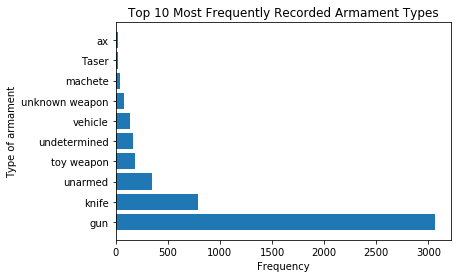

In [5]:
plt.xlabel("Frequency")
plt.ylabel("Type of armament")
plt.title("Top 10 Most Frequently Recorded Armament Types")
plt.barh(data[ARMED].value_counts()[:10].index, data[ARMED].value_counts()[:10].values)

## Age

(array([   7.,  579., 1458., 1220.,  877.,  557.,  337.,  101.,   34.,
          11.]),
 array([ 6. , 14.5, 23. , 31.5, 40. , 48.5, 57. , 65.5, 74. , 82.5, 91. ]),
 <a list of 10 Patch objects>)

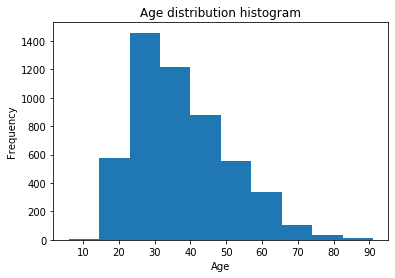

In [6]:
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution histogram")
plt.xticks([i * 10 for i in range(10)])
plt.hist(data[(np.isnan(data[AGE]) == False)][AGE]) # Skip data points where the age is nan

## Gender

Text(0.5, 1.0, 'Gender distribution of fatal police shootings')

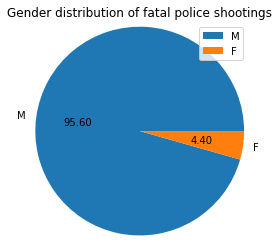

In [7]:
x = [(data[GENDER] == "M").value_counts()[True], (data[GENDER] == "F").value_counts()[True]]
labels = ["M", "F"]
plt.pie(x, labels=labels, autopct="%.2f", radius=1.2)
plt.legend()
plt.title("Gender distribution of fatal police shootings")

## Race

Text(0.5, 1.0, 'Race distribution')

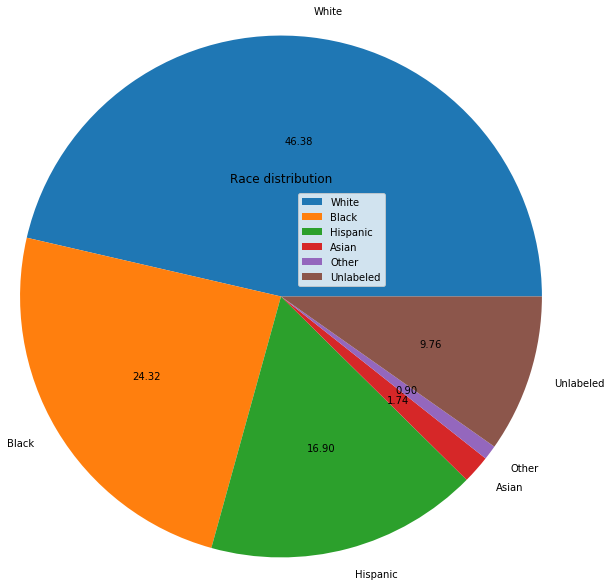

In [8]:
x = [(data[RACE] == "W").value_counts()[True], 
     (data[RACE] == "B").value_counts()[True],
     (data[RACE] == "H").value_counts()[True],
     (data[RACE] == "A").value_counts()[True],
     (data[RACE] == "O").value_counts()[True],
     (pd.isnull(data[RACE])).value_counts()[True],
    ]
labels = ["White", "Black", "Hispanic", "Asian", "Other", "Unlabeled"]
plt.pie(x, labels=labels, autopct="%.2f", radius=3)
plt.legend()
plt.title("Race distribution")

## State

In [30]:
fig = px.choropleth(locations=data[STATE].value_counts().index, 
                    locationmode="USA-states", 
                    color=data[STATE].value_counts().values,
                    scope="usa", 
                    title="Fatal police shootings by state (color = number of fatalities)")
fig.show()

## Signs of mental illness

Text(0.5, 1.0, 'Distribution of mental illness in fatal police shootings')

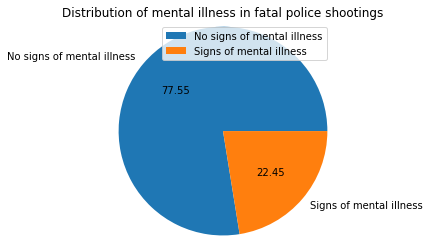

In [48]:
x = data[SIGNS].value_counts().values
labels = ["No signs of mental illness", "Signs of mental illness"]
plt.pie(x, labels=labels, autopct="%.2f", radius=1.2)
plt.legend()
plt.title("Distribution of mental illness in fatal police shootings")

## Types of threats

Text(0.5, 1.0, 'Types of threats in fatal police shootings')

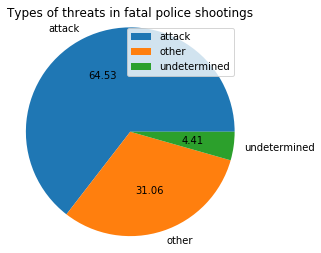

In [51]:
x = data[THREAT].value_counts().values
labels = data[THREAT].value_counts().index
plt.pie(x, labels=labels, autopct="%.2f", radius=1.2)
plt.legend()
plt.title("Types of threats in fatal police shootings")

# Fleeing

Text(0.5, 1.0, 'Flight in fatal police shootings')

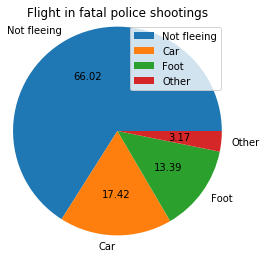

In [52]:
x = data[FLEE].value_counts().values
labels = data[FLEE].value_counts().index
plt.pie(x, labels=labels, autopct="%.2f", radius=1.2)
plt.legend()
plt.title("Flight in fatal police shootings")

# Body camera

Text(0.5, 1.0, 'Presence of body cameras fatal police shootings')

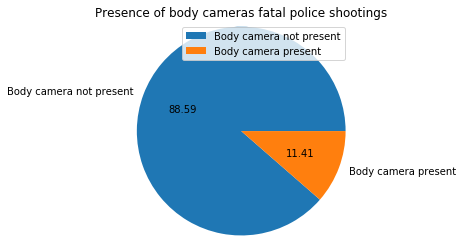

In [54]:
x = data[BODY].value_counts().values
labels = ["Body camera not present", "Body camera present"]
plt.pie(x, labels=labels, autopct="%.2f", radius=1.2)
plt.legend()
plt.title("Presence of body cameras fatal police shootings")